In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import re
import os 
import sys
import warnings
warnings.simplefilter(action = 'ignore')

In [2]:
crime_data = pd.read_csv('/0.ITstudy/9.pandas_data/aaaDPD__All_Crime_Incidents__December_6__2016_-_Present.csv')


In [3]:
crime_data.head()

,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Arrest Charge,Charge Description,State Offense Code,Incident Date & Time,Incident Time (24h),...,Precinct Number,Census Block GEOID,Neighborhood,Council District,Zip Code,Longitude,Latitude,IBR Report Date,Location,uniq
0,3104611,1708150123,5000 block of LANNOO ST,MOTOR VEHICLE THEFT,STOLEN VEHICLE,24001,MOTOR VEHICLE THEFT,2401,08/14/2017 05:00:00 PM,1700,...,5,2.616350e+14,Cornerstone Village,4.0,NaN,-82.912447,42.415611,08/16/2017 01:48:20 PM,"location\n(42.41561, -82.91245)","56,994"
1,3107714,1708220195,Corner of MACKENZIE ST and MARK TWAIN ST,ROBBERY,ROBBERY,12000,ROBBERY,1201,08/22/2017 02:04:00 PM,1404,...,2,2.616350e+14,Joy-Schaefer,7.0,NaN,-83.184692,42.356050,09/13/2017 10:16:26 AM,"location\n(42.35605, -83.18469)","58,749"
2,3104644,1708150160,16900 block of W CHICAGO ST,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,LARCENY,23005,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,2305,08/14/2017 04:00:00 PM,1600,...,6,2.616350e+14,Joy Community,7.0,NaN,-83.211945,42.365163,08/16/2017 01:48:20 PM,"location\n(42.36516, -83.21195)","57,012"
3,3104651,1708150159,11700 block of NASHVILLE ST,BURGLARY - FORCED ENTRY,BURGLARY,22001,BURGLARY - FORCED ENTRY,2201,08/13/2017 03:00:00 PM,1500,...,9,2.616350e+14,LaSalle College Park,4.0,NaN,-83.000401,42.417198,08/28/2017 09:30:06 AM,"location\n(42.4172, -83.0004)","57,017"
4,3104659,1708150184,19600 block of SCHOENHERR ST,FAMILY - OTHER,FAMILY OFFENSE,38003,FAMILY - OTHER,3803,08/15/2017 12:41:00 PM,1241,...,9,2.616350e+14,Pulaski,3.0,NaN,-82.985353,42.439755,08/16/2017 01:48:20 PM,"location\n(42.43975, -82.98535)","57,023"


In [4]:
crime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166268 entries, 0 to 166267
Data columns (total 24 columns):
Crime ID                     166268 non-null int64
Report #                     166268 non-null object
Incident Address             166268 non-null object
Offense Description          166268 non-null object
Offense Category             166268 non-null object
Arrest Charge                166268 non-null object
Charge Description           166268 non-null object
State Offense Code           166268 non-null int64
Incident Date & Time         166268 non-null object
Incident Time (24h)          166268 non-null int64
Day of Week (Sunday is 1)    166268 non-null int64
Hour of Day                  166268 non-null int64
Year                         166268 non-null int64
Scout Car Area               166268 non-null object
Precinct Number              166268 non-null object
Census Block GEOID           165347 non-null float64
Neighborhood                 163947 non-null object
Council Di

In [5]:
crime_data.isnull().any()

Crime ID                     False
Report #                     False
Incident Address             False
Offense Description          False
Offense Category             False
Arrest Charge                False
Charge Description           False
State Offense Code           False
Incident Date & Time         False
Incident Time (24h)          False
Day of Week (Sunday is 1)    False
Hour of Day                  False
Year                         False
Scout Car Area               False
Precinct Number              False
Census Block GEOID            True
Neighborhood                  True
Council District              True
Zip Code                      True
Longitude                     True
Latitude                      True
IBR Report Date              False
Location                      True
uniq                         False
dtype: bool

In [6]:
crime_data['Offense Category'].unique()

array(['STOLEN VEHICLE', 'ROBBERY', 'LARCENY', 'BURGLARY',
       'FAMILY OFFENSE', 'DANGEROUS DRUGS', 'DAMAGE TO PROPERTY',
       'ASSAULT', 'AGGRAVATED ASSAULT', 'SEX OFFENSES',
       'WEAPONS OFFENSES', 'DISORDERLY CONDUCT', 'HOMICIDE', 'FORGERY',
       'OUIL', 'FRAUD', 'SEXUAL ASSAULT', 'OBSTRUCTING JUDICIARY',
       'LIQUOR', 'ARSON', 'OBSTRUCTING THE POLICE', 'KIDNAPPING',
       'MISCELLANEOUS', 'OTHER', 'STOLEN PROPERTY', 'SOLICITATION',
       'RUNAWAY', 'JUSTIFIABLE HOMICIDE', 'EXTORTION', 'GAMBLING'],
      dtype=object)

In [7]:
len(crime_data['Offense Category'].unique())

30

In [38]:
crime_data.loc[(crime_data['Offense Category'] =='HOMICIDE'),'Offense Category'].count()

512

In [8]:
def year_ex(x):
    year_reg = re.compile(r'\d{4}')
    return(year_reg.findall(x)[0])

In [9]:
dummy = crime_data.copy()
dummy['year']  = dummy['IBR Report Date'].apply(year_ex)

In [10]:
dummy.shape

(166268, 25)

In [11]:
dummy.head()

,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Arrest Charge,Charge Description,State Offense Code,Incident Date & Time,Incident Time (24h),...,Census Block GEOID,Neighborhood,Council District,Zip Code,Longitude,Latitude,IBR Report Date,Location,uniq,year
0,3104611,1708150123,5000 block of LANNOO ST,MOTOR VEHICLE THEFT,STOLEN VEHICLE,24001,MOTOR VEHICLE THEFT,2401,08/14/2017 05:00:00 PM,1700,...,2.616350e+14,Cornerstone Village,4.0,NaN,-82.912447,42.415611,08/16/2017 01:48:20 PM,"location\n(42.41561, -82.91245)","56,994",2017
1,3107714,1708220195,Corner of MACKENZIE ST and MARK TWAIN ST,ROBBERY,ROBBERY,12000,ROBBERY,1201,08/22/2017 02:04:00 PM,1404,...,2.616350e+14,Joy-Schaefer,7.0,NaN,-83.184692,42.356050,09/13/2017 10:16:26 AM,"location\n(42.35605, -83.18469)","58,749",2017
2,3104644,1708150160,16900 block of W CHICAGO ST,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,LARCENY,23005,LARCENY - PERSONAL PROPERTY FROM MOTOR VEHICLE,2305,08/14/2017 04:00:00 PM,1600,...,2.616350e+14,Joy Community,7.0,NaN,-83.211945,42.365163,08/16/2017 01:48:20 PM,"location\n(42.36516, -83.21195)","57,012",2017
3,3104651,1708150159,11700 block of NASHVILLE ST,BURGLARY - FORCED ENTRY,BURGLARY,22001,BURGLARY - FORCED ENTRY,2201,08/13/2017 03:00:00 PM,1500,...,2.616350e+14,LaSalle College Park,4.0,NaN,-83.000401,42.417198,08/28/2017 09:30:06 AM,"location\n(42.4172, -83.0004)","57,017",2017
4,3104659,1708150184,19600 block of SCHOENHERR ST,FAMILY - OTHER,FAMILY OFFENSE,38003,FAMILY - OTHER,3803,08/15/2017 12:41:00 PM,1241,...,2.616350e+14,Pulaski,3.0,NaN,-82.985353,42.439755,08/16/2017 01:48:20 PM,"location\n(42.43975, -82.98535)","57,023",2017


In [36]:
dummy.loc[(dummy['Offense Category'] =='LIQUOR'),'Offense Category'].count()

0

In [13]:
166268 - 289 - 823

165156

In [14]:
liq_list =dummy.loc[(dummy['Offense Category'] == 'LIQUOR')]

In [15]:
run_list =dummy.loc[(dummy['Offense Category'] == 'RUNAWAY')]

In [16]:
pol_list =dummy.loc[(dummy['Offense Category'] == 'OBSTRUCTING THE POLICE')]

In [17]:
liq_list.index

Int64Index([   126,    733,   1497,   2150,   3025,   3622,   4071,   4095,
              6564,   6565,
            ...
            158746, 159004, 159715, 159965, 162670, 163302, 163461, 163578,
            163622, 165618],
           dtype='int64', length=289)

In [18]:
try:
    dummy = dummy.drop(liq_list.index, axis = 0)
except:
    print('not contain')

In [19]:
try:
    dummy = dummy.drop(run_list.index, axis = 0)
except:
    print('not contain')

In [20]:
try:
    dummy = dummy.drop(pol_list.index, axis = 0)
except:
    print('not contain')

In [21]:
dummy.shape

(164656, 25)

In [22]:
dummy.loc[(dummy['Offense Category'] =='LIQUOR')]

,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Arrest Charge,Charge Description,State Offense Code,Incident Date & Time,Incident Time (24h),...,Census Block GEOID,Neighborhood,Council District,Zip Code,Longitude,Latitude,IBR Report Date,Location,uniq,year


In [23]:
dummy.loc[(dummy['Offense Category'] =='RUNAWAY')]

,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Arrest Charge,Charge Description,State Offense Code,Incident Date & Time,Incident Time (24h),...,Census Block GEOID,Neighborhood,Council District,Zip Code,Longitude,Latitude,IBR Report Date,Location,uniq,year


In [24]:
dummy.loc[(dummy['Offense Category'] =='OBSTRUCTING THE POLICE')]

,Crime ID,Report #,Incident Address,Offense Description,Offense Category,Arrest Charge,Charge Description,State Offense Code,Incident Date & Time,Incident Time (24h),...,Census Block GEOID,Neighborhood,Council District,Zip Code,Longitude,Latitude,IBR Report Date,Location,uniq,year


In [25]:
dummy.to_csv('destroit_edit.csv')

In [26]:
dummy[(dummy['Offense Category'] == 'FRAUD')].count()[0]/dummy.shape[0] * 100

7.374161889029248

In [27]:
%matplotlib inline
import seaborn as sns


In [29]:
dummy_crime = (dummy['Offense Category'])

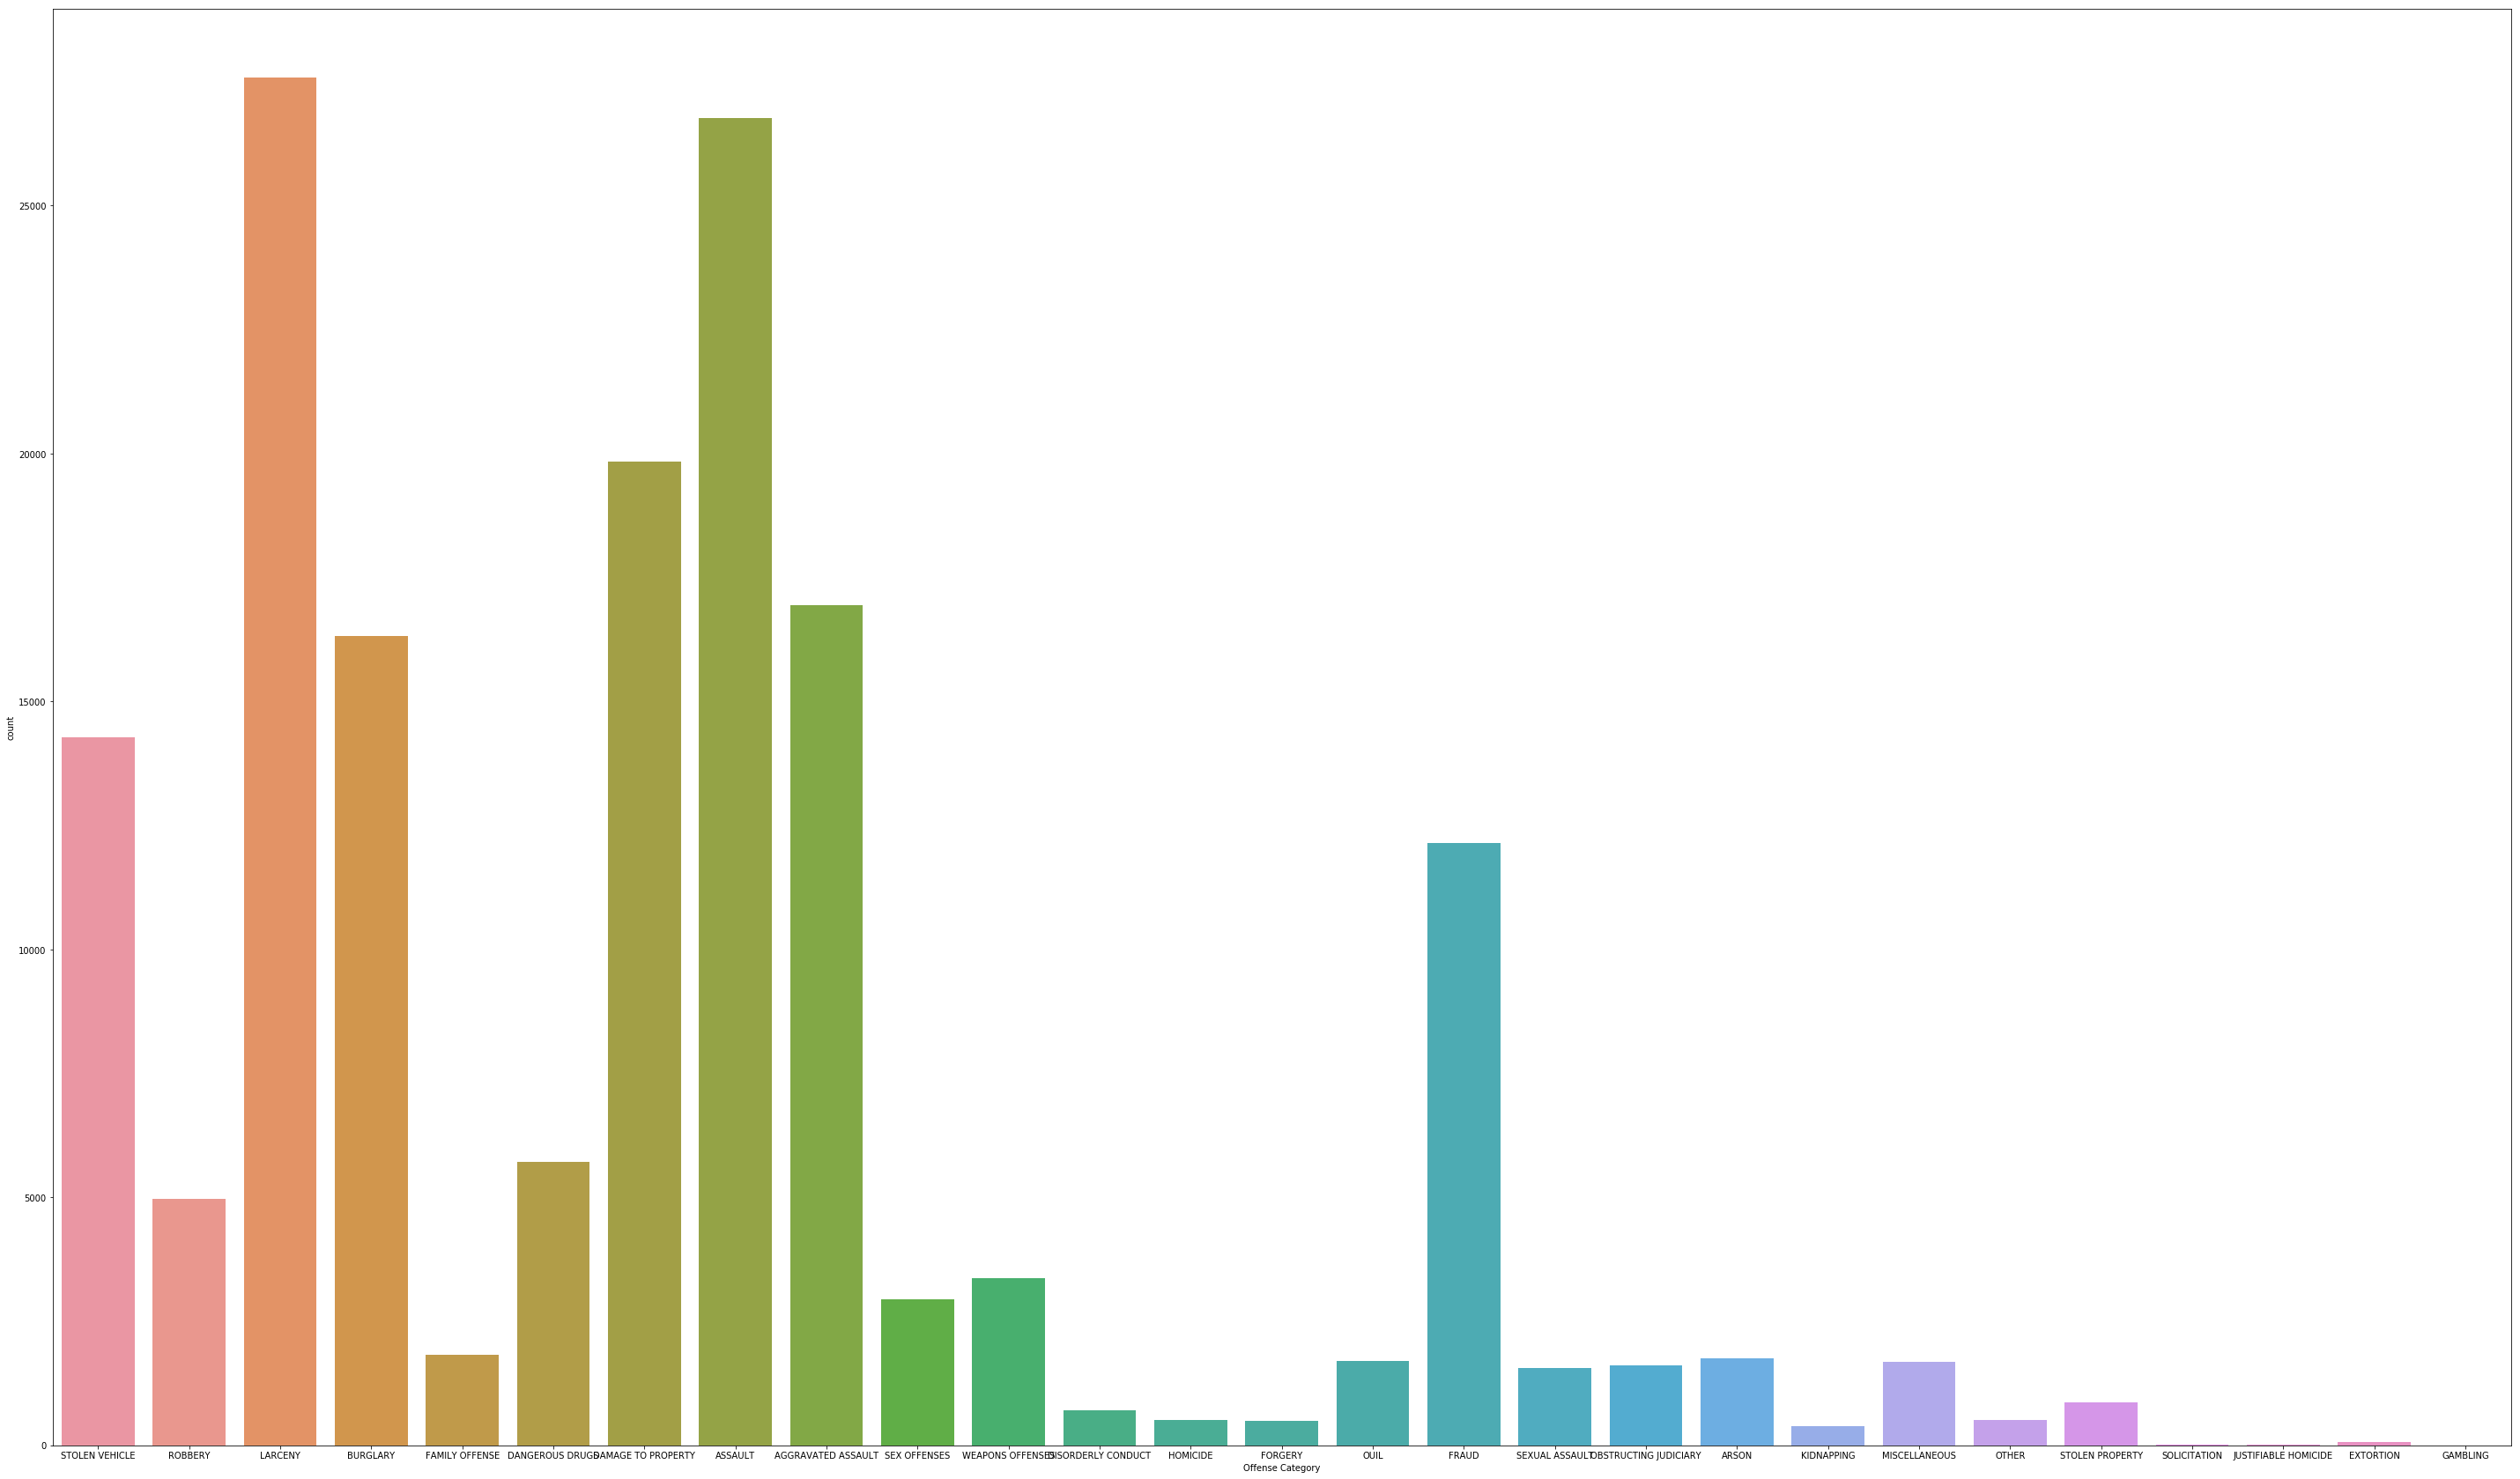

In [40]:
f,ax=plt.subplots(1,1,figsize=(50,30))

sns_plot = sns.countplot('Offense Category',data = dummy)
fig = sns_plot.get_figure()
fig.savefig('pic.png', dpi = 300)

In [34]:
dummy.loc[(dummy['Offense Category'] == 'JUSTIFIABLE HOMICIDE'),'Offense Category']= 'HOMICIDE'

In [35]:
dummy.loc[(dummy['Offense Category'] == 'SOLICITATION'),'Offense Category']= 'HOMICIDE'

In [39]:
dummy.loc[(dummy['Offense Category'] =='HOMICIDE'),'Offense Category'].count()

555

In [40]:
dummy.loc[(dummy['Offense Category'] =='SOLICITATAION'),'Offense Category'].count()

0

In [41]:
dummy.loc[(dummy['Offense Category'] == 'BURGLARY'),'Offense Category']= 'THEFT'

In [42]:
dummy.loc[(dummy['Offense Category'] == 'STOLEN PROPERTY'),'Offense Category']= 'THEFT'

In [43]:
dummy.loc[(dummy['Offense Category'] == 'LARCENY'),'Offense Category']= 'THEFT'

In [44]:
dummy.loc[(dummy['Offense Category'] == 'STOLEN VEHICLE'),'Offense Category']= 'THEFT'

In [48]:
assaults = ['FAMILY OFFENSE' ,'AGGRAVATED ASSAULT' ,'ASSAULT']
for i in assaults:
    dummy.loc[(dummy['Offense Category'] == i),'Offense Category']= 'ASSAULT'
    print(dummy.loc[(dummy['Offense Category'] == i),'Offense Category'].count())

0
0
45538


In [50]:
others = ['OTHER','MISCELLANEOUS']
for i in others:
    dummy.loc[(dummy['Offense Category'] == i),'Offense Category']= 'OTHER'
    print(dummy.loc[(dummy['Offense Category'] == i),'Offense Category'].count())

508
0


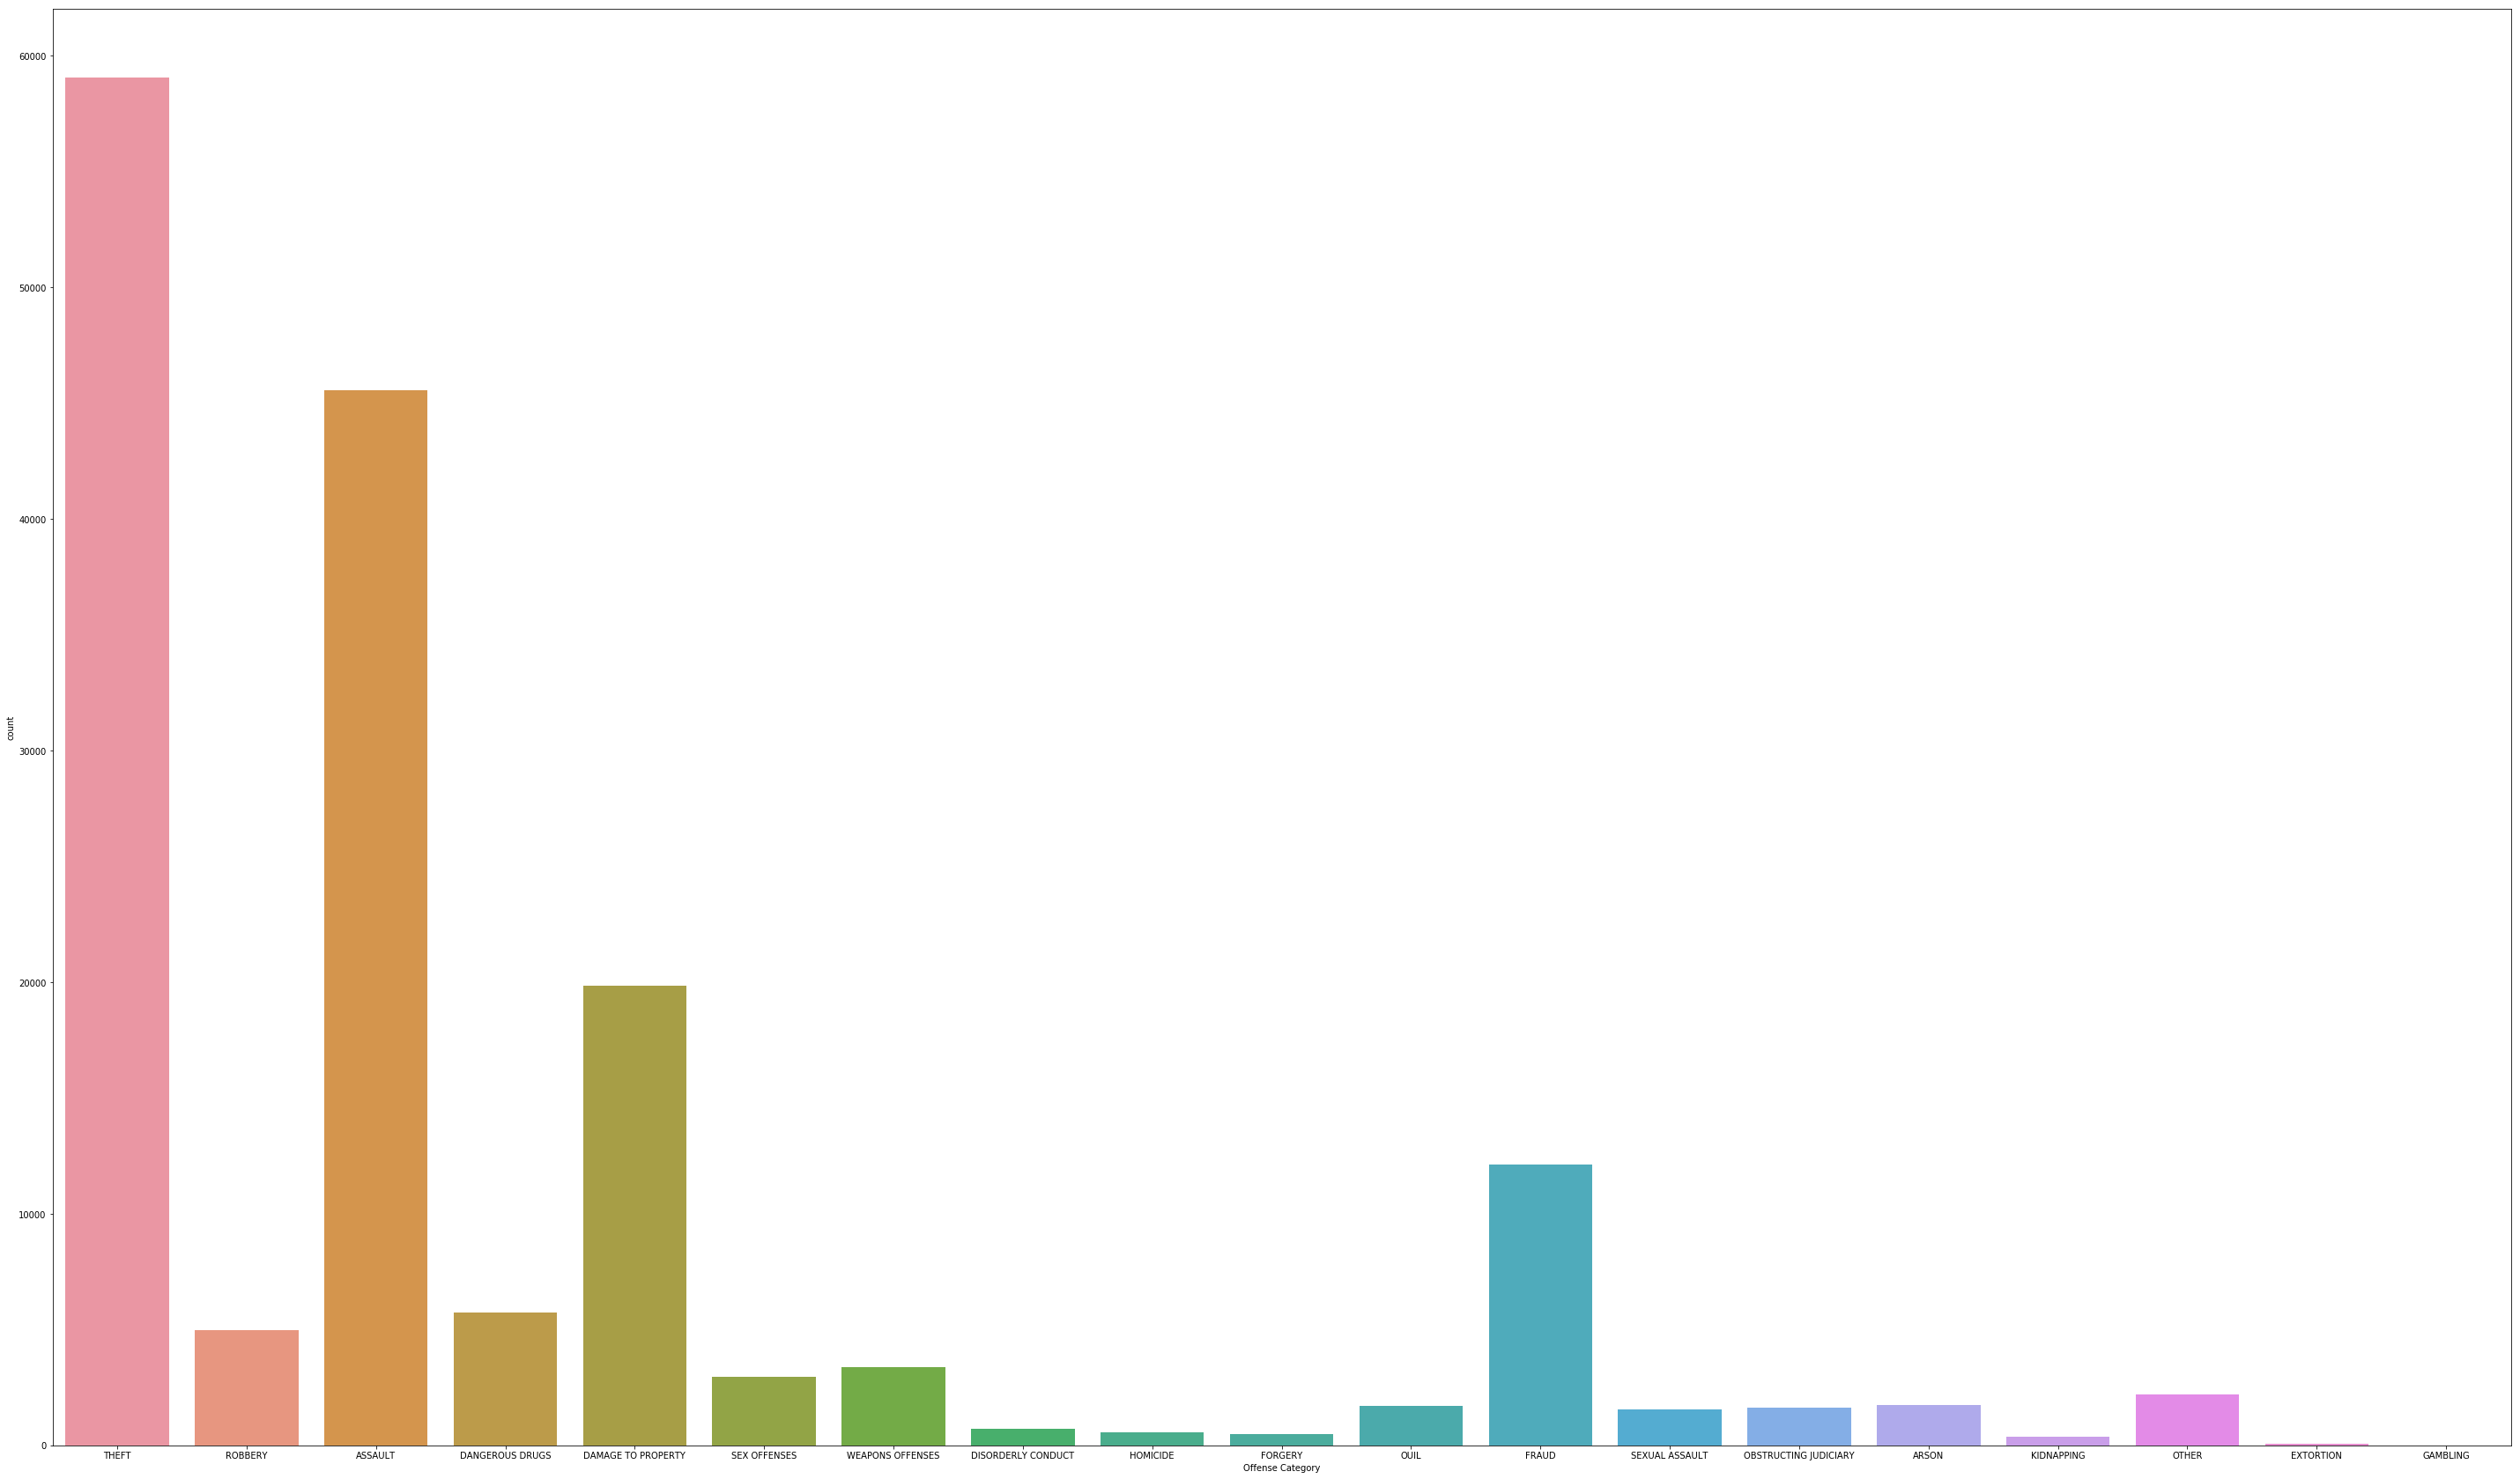

In [55]:
f,ax=plt.subplots(1,1,figsize=(50,30))

sns_plot = sns.countplot('Offense Category',data = dummy)
fig = sns_plot.get_figure()
fig.savefig('pic_result.png', dpi = 300)

In [52]:
dummy['Offense Category'].unique()

array(['THEFT', 'ROBBERY', 'ASSAULT', 'DANGEROUS DRUGS',
       'DAMAGE TO PROPERTY', 'SEX OFFENSES', 'WEAPONS OFFENSES',
       'DISORDERLY CONDUCT', 'HOMICIDE', 'FORGERY', 'OUIL', 'FRAUD',
       'SEXUAL ASSAULT', 'OBSTRUCTING JUDICIARY', 'ARSON', 'KIDNAPPING',
       'OTHER', 'EXTORTION', 'GAMBLING'], dtype=object)

In [53]:
len(dummy['Offense Category'].unique())

19

In [54]:
len(crime_data['Offense Category'].unique())

30

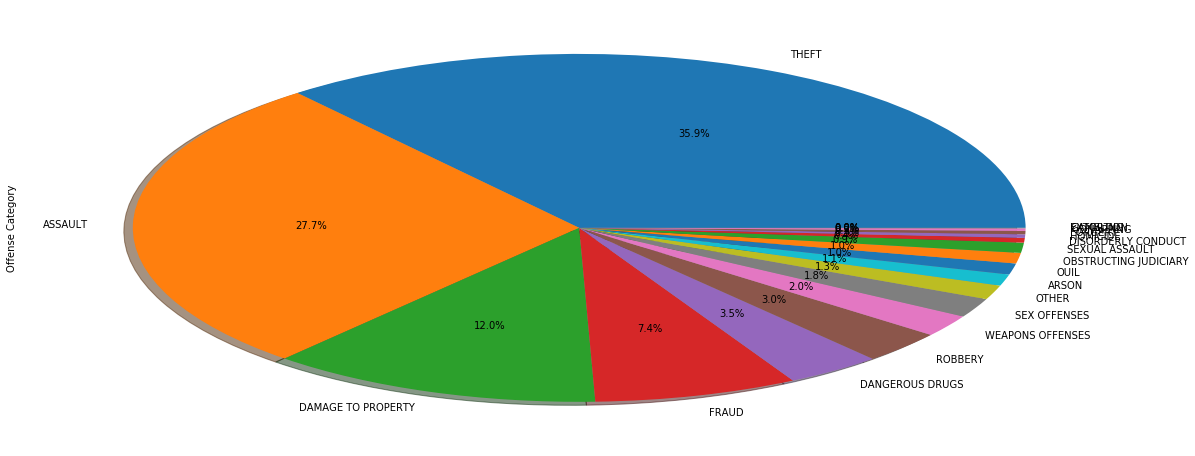

In [63]:
f,ax = plt.subplots(1,1,figsize = (20,8))
plt_pie =dummy['Offense Category'].value_counts().plot.pie(explode = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0],autopct='%1.1f%%',ax = ax,shadow = True)
fig = plt_pie.get_figure()
fig.savefig('pic_pie.png', dpi = 300)